In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("~/Desktop/datasets/cleaned_dataset.csv")
columns = list(data.columns)


#plt.scatter(data_2009["Adult Mortality"], data_2009["Life expectancy "], label = "scatter plot")
#plt.xlabel("adult mortality in 2009")
#plt.ylabel("life expectancy in 2009")'''


## 1.Correlation Heatmap

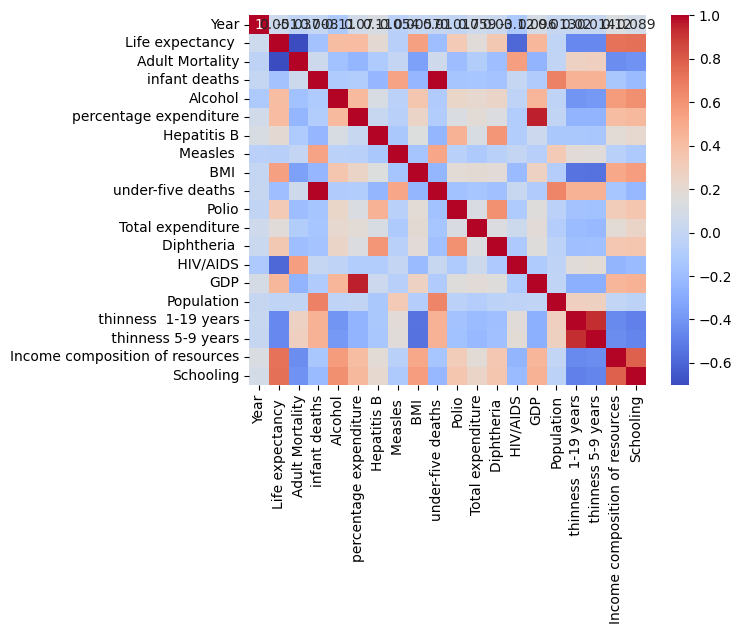

In [3]:
corr_data = data.drop(columns=['Country', 'Status'])
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

from the correlation heatmap we can conclude that Life expectancy is :

    1.positively correlated with : (schooling, Income compostion of ressources, GDP, BMI)
        -ICOR : Income composition of resources.
        -GDP : Gross Domestic Product per capita (in USD).
        -BMI : Average Body Mass Index of entire population. 
    2.negatively correlated with : (Adult Mortality, HIV/AIDS, thinness 1-19 years, thinness 5-9 years)

The fact that there is a negative correaltion between life expectancy and some other factors indicates that there might be a relationship between theim

### Scatter plot for positive correlation

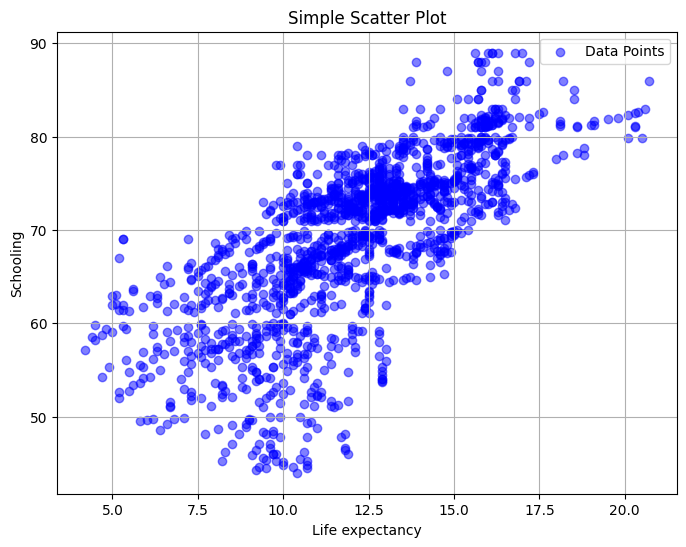

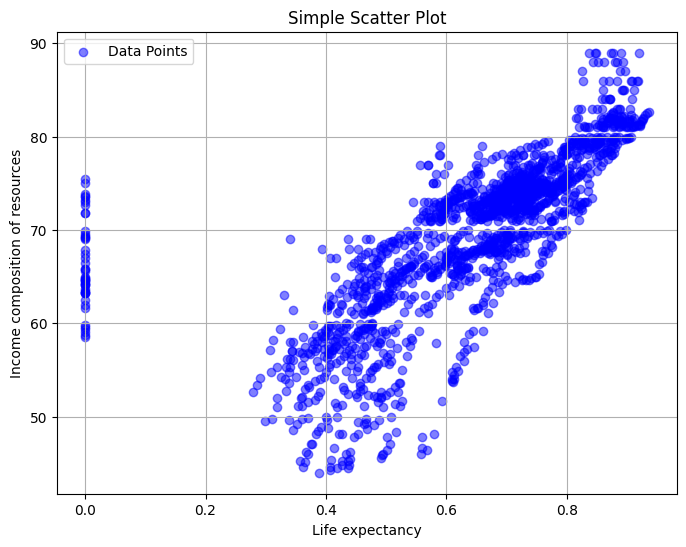

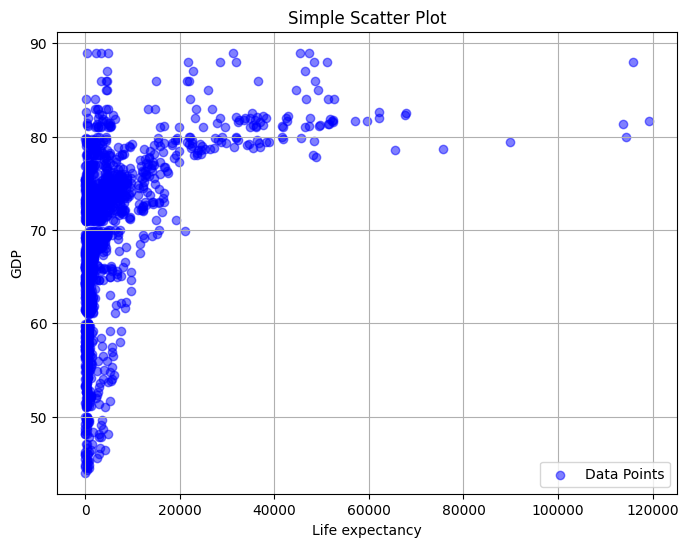

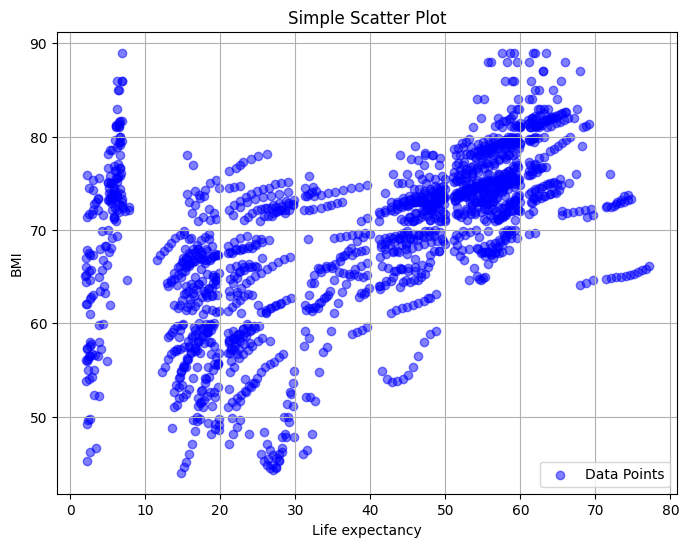

In [4]:

positive_corr = [corr_data['Schooling'], corr_data['Income composition of resources'], corr_data['GDP'], corr_data[' BMI ']]
columns = ['Schooling', 'Income composition of resources', 'GDP', 'BMI']

for i in range(len(positive_corr)):

    plt.figure(figsize=(8, 6))
    plt.scatter(positive_corr[i], corr_data['Life expectancy '], color='blue', alpha=0.5, label='Data Points')


    plt.xlabel('Life expectancy')
    plt.ylabel(columns[i])
    plt.title('Simple Scatter Plot')

    # Show legend
    plt.legend()

    # Show plot
    plt.grid(True)  # Show grid
    plt.show()

### Scatter plot for negative correlation

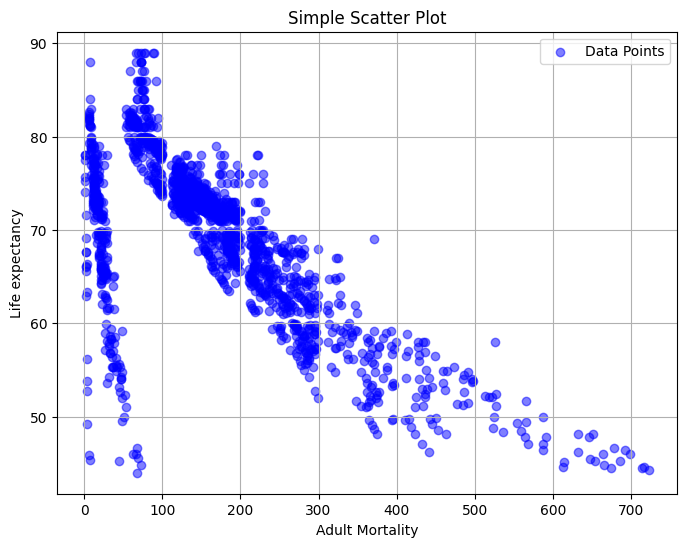

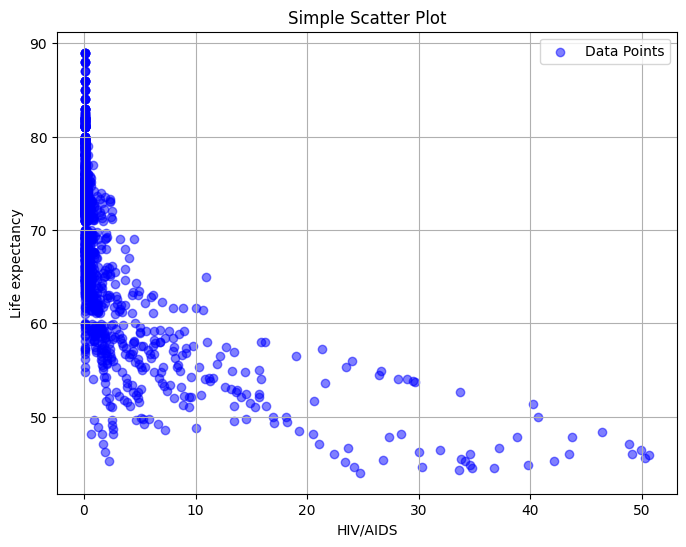

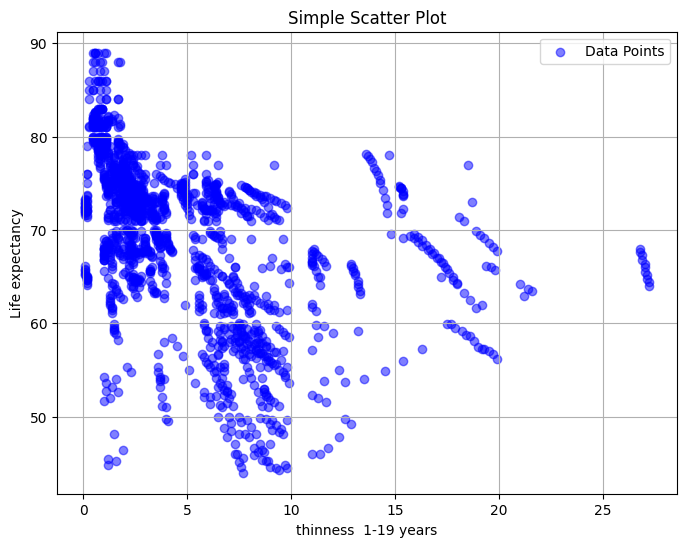

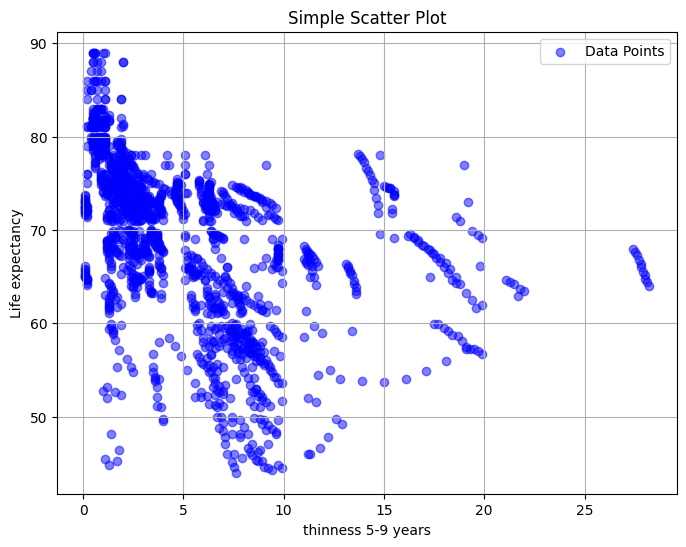

In [5]:

negative_corr = [corr_data['Adult Mortality'], corr_data[' HIV/AIDS'], corr_data[' thinness  1-19 years'], corr_data[' thinness 5-9 years']]
columns = ['Adult Mortality', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years']

for i in range(len(negative_corr)):

    plt.figure(figsize=(8, 6))
    plt.scatter(negative_corr[i], corr_data['Life expectancy '], color='blue', alpha=0.5, label='Data Points')


    plt.ylabel('Life expectancy')
    plt.xlabel(columns[i])
    plt.title('Simple Scatter Plot')

   
    plt.legend()

    
    plt.grid(True)
    plt.show()

### Apply Linear Regression 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

for i in range(len(negative_corr)):
    x = np.array(negative_corr[i]).reshape(-1, 1)
    y = np.array(data['Life expectancy '])
    # Create a Linear Regression model
    model = LinearRegression()

        # Fit the model to the data
    model.fit(x, y)

        # Make predictions
    predictions = model.predict(x)

        # Evaluate the model

    r_squared = r2_score(y, predictions)    
    print("R-squared of : " + columns[i]  + f" is  {r_squared}")

R-squared of : Adult Mortality is  0.4935386530731678
R-squared of : HIV/AIDS is  0.35074382626387135
R-squared of : thinness  1-19 years is  0.2096158112898494
R-squared of : thinness 5-9 years is  0.20931383245937785


In [7]:


x = np.array(corr_data[['Adult Mortality', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years']]).reshape(-1, 4)
y = np.array(data['Life expectancy '])
    # Create a Linear Regression model
model = LinearRegression()

    # Fit the model to the data
model.fit(x, y)

    # Make predictions
predictions = model.predict(x)

    # Evaluate the model

r_squared = r2_score(y, predictions)    
print(f"R-squared : {r_squared}")


    # Plot the scatter plot

'''plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Data Points', alpha=0.5)

    # Plot the regression line
    plt.plot(x, predictions, color='red', label='Linear Regression')

    # Set labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot with Linear Regression Line')

    # Show legend
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()'''


R-squared : 0.6278284343225524


"plt.figure(figsize=(8, 6))\n    plt.scatter(x, y, color='blue', label='Data Points', alpha=0.5)\n\n    # Plot the regression line\n    plt.plot(x, predictions, color='red', label='Linear Regression')\n\n    # Set labels and title\n    plt.xlabel('X-axis')\n    plt.ylabel('Y-axis')\n    plt.title('Scatter Plot with Linear Regression Line')\n\n    # Show legend\n    plt.legend()\n\n    # Show plot\n    plt.grid(True)\n    plt.show()"

<div>The value of the R-squared is 0.62, this value can be increased by processing the data and removing the outliers.</div>


## Data Cleaning

### Interquartile Range IQR

In [10]:
print(corr_data)


'''x = np.array(corr_data['Adult Mortality']).reshape(-1, 1)
y = np.array(data['Life expectancy '])
    # Create a Linear Regression model
model = LinearRegression()

        # Fit the model to the data
model.fit(x, y)

        # Make predictions
predictions = model.predict(x)

        # Evaluate the model

r_squared = r2_score(y, predictions)    
    
print("R-squared of : " + columns[i]  + f" is  {r_squared}")'''
'''# Calculate IQR for 'Column1'
Q1 = corr_data['Life expectancy '].quantile(0.25)
Q3 = corr_data['Life expectancy '].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = corr_data[(corr_data['Life expectancy '] < lower_bound) | (corr_data['Life expectancy '] > upper_bound)]
#outliers.drop(outliers[outliers['Adult Mortality'] > 100].index, inplace=True)
# Display or handle outliers as needed
plt.scatter(outliers[' thinness  1-19 years'], outliers['Life expectancy '], color='blue', alpha=0.5, label='Data Points')
plt.show()'''






      Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015              65.0            263.0             62     0.01   
1     2014              59.9            271.0             64     0.01   
2     2013              59.9            268.0             66     0.01   
3     2012              59.5            272.0             69     0.01   
4     2011              59.2            275.0             71     0.01   
...    ...               ...              ...            ...      ...   
1644  2004              44.3            723.0             27     4.36   
1645  2003              44.5            715.0             26     4.06   
1646  2002              44.8             73.0             25     4.43   
1647  2001              45.3            686.0             25     1.72   
1648  2000              46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   

"# Calculate IQR for 'Column1'\nQ1 = corr_data['Life expectancy '].quantile(0.25)\nQ3 = corr_data['Life expectancy '].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define bounds for outliers\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Identify outliers\noutliers = corr_data[(corr_data['Life expectancy '] < lower_bound) | (corr_data['Life expectancy '] > upper_bound)]\n#outliers.drop(outliers[outliers['Adult Mortality'] > 100].index, inplace=True)\n# Display or handle outliers as needed\nplt.scatter(outliers[' thinness  1-19 years'], outliers['Life expectancy '], color='blue', alpha=0.5, label='Data Points')\nplt.show()"